# Elbow Method

In [173]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

In [139]:
X = pd.read_csv('dataset_10.csv')
X = X.values
X
# data.head()

array([[  6.44321933, -12.0871745 , -18.0645903 , ...,   2.14309937,
        -19.74579069, -26.31353448],
       [-26.35405145,  25.01723254,  15.55671667, ...,  24.97133355,
        -23.48807591,   1.60989715],
       [ 29.20146318, -14.6092593 , -10.79720992, ..., -24.94116757,
        -18.78609108,  -5.68247525],
       ...,
       [  6.70579213, -23.63804027,  10.99525815, ...,  21.08273311,
         13.19186585,  12.6379566 ],
       [  4.5860307 ,  -1.96344084,   5.45097003, ...,   8.75993867,
         23.36188819,   6.68836822],
       [-27.43386783,  25.65604093,  16.33988563, ...,  25.99056215,
        -25.40084131,   1.63967727]])

In [140]:
pca = PCA(2)
pca.fit(X)
X = pca.transform(X)

In [141]:
# Normalize data 
#mms = MinMaxScaler()
#mms.fit(X)
#X = mms.transform(X)
np.shape(X)

(511, 2)

In [142]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k).fit(X)
    # Sum of squared distances of point to its closest cluster center
    Sum_of_squared_distances.append(km.inertia_)

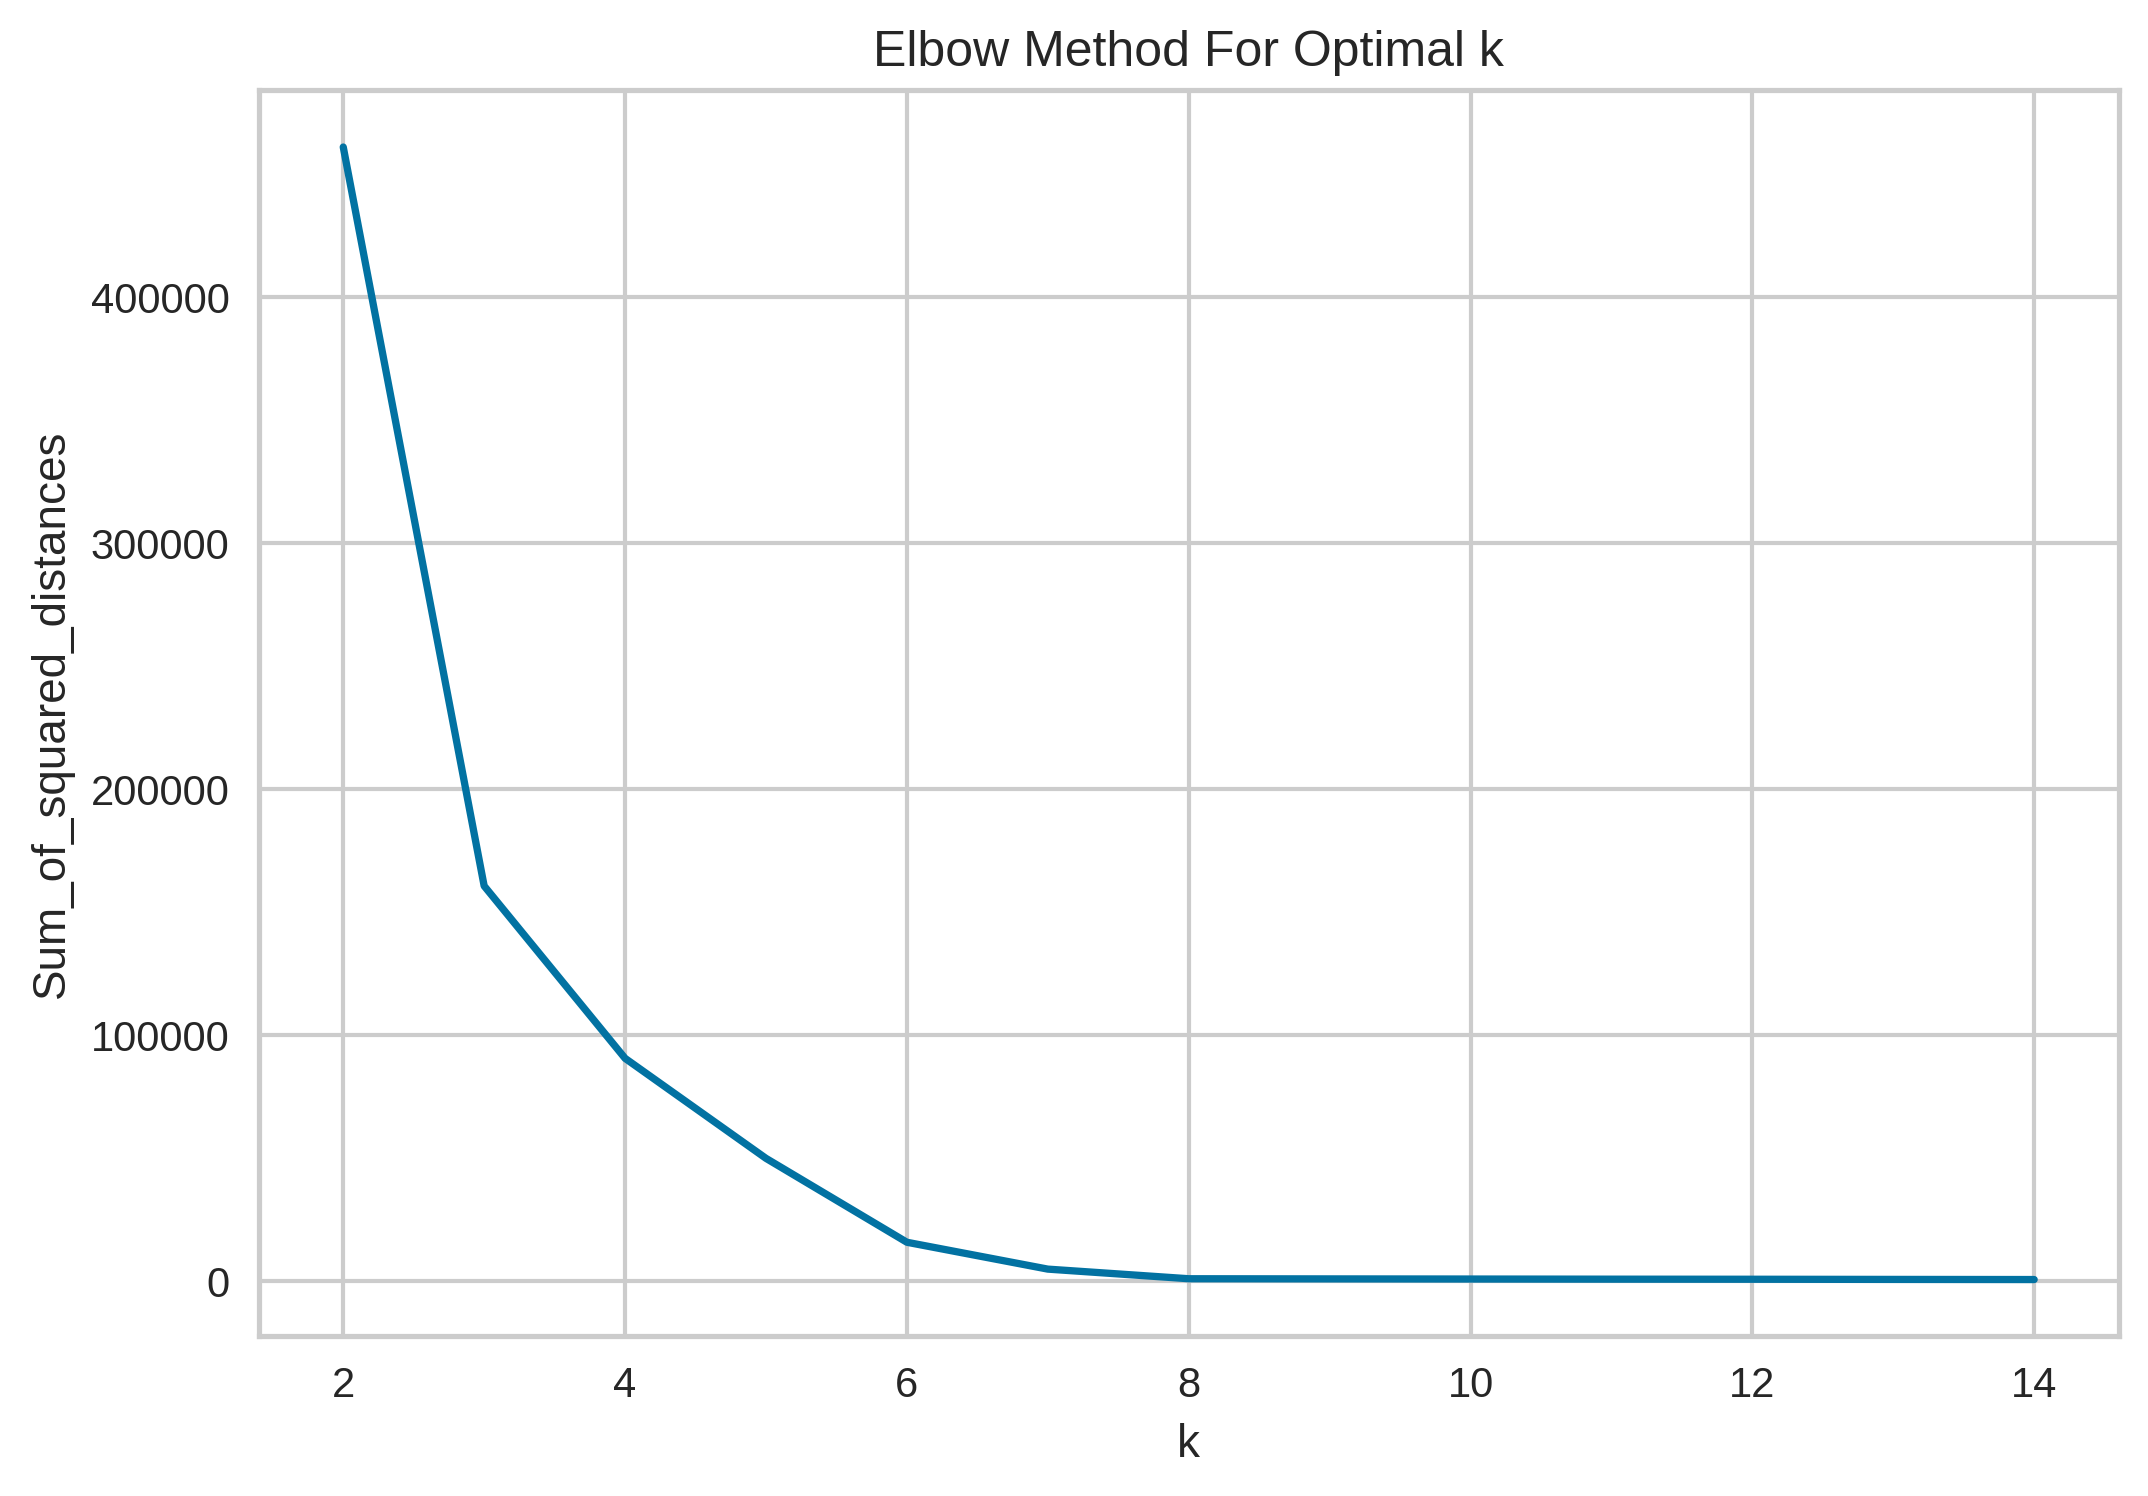

In [143]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Method

In [144]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [145]:
Sscore = []
K = range(3,13)
for i in range(3,13):
    # Question: init = "k-means++" or 'random'?
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=0).fit(X).labels_
    out  = metrics.silhouette_score(X,labels,metric="euclidean",sample_size=200,random_state=0)
    Sscore.append(out)
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(out))

Silhouette score for k(clusters) = 3 is 0.6807423257846276
Silhouette score for k(clusters) = 4 is 0.7497703086028413
Silhouette score for k(clusters) = 5 is 0.748180184109753
Silhouette score for k(clusters) = 6 is 0.8381092286368134
Silhouette score for k(clusters) = 7 is 0.8829578916675258
Silhouette score for k(clusters) = 8 is 0.9103862912405678
Silhouette score for k(clusters) = 9 is 0.8640757887127768
Silhouette score for k(clusters) = 10 is 0.7977772853961784
Silhouette score for k(clusters) = 11 is 0.7586839879732085
Silhouette score for k(clusters) = 12 is 0.6088819711666251


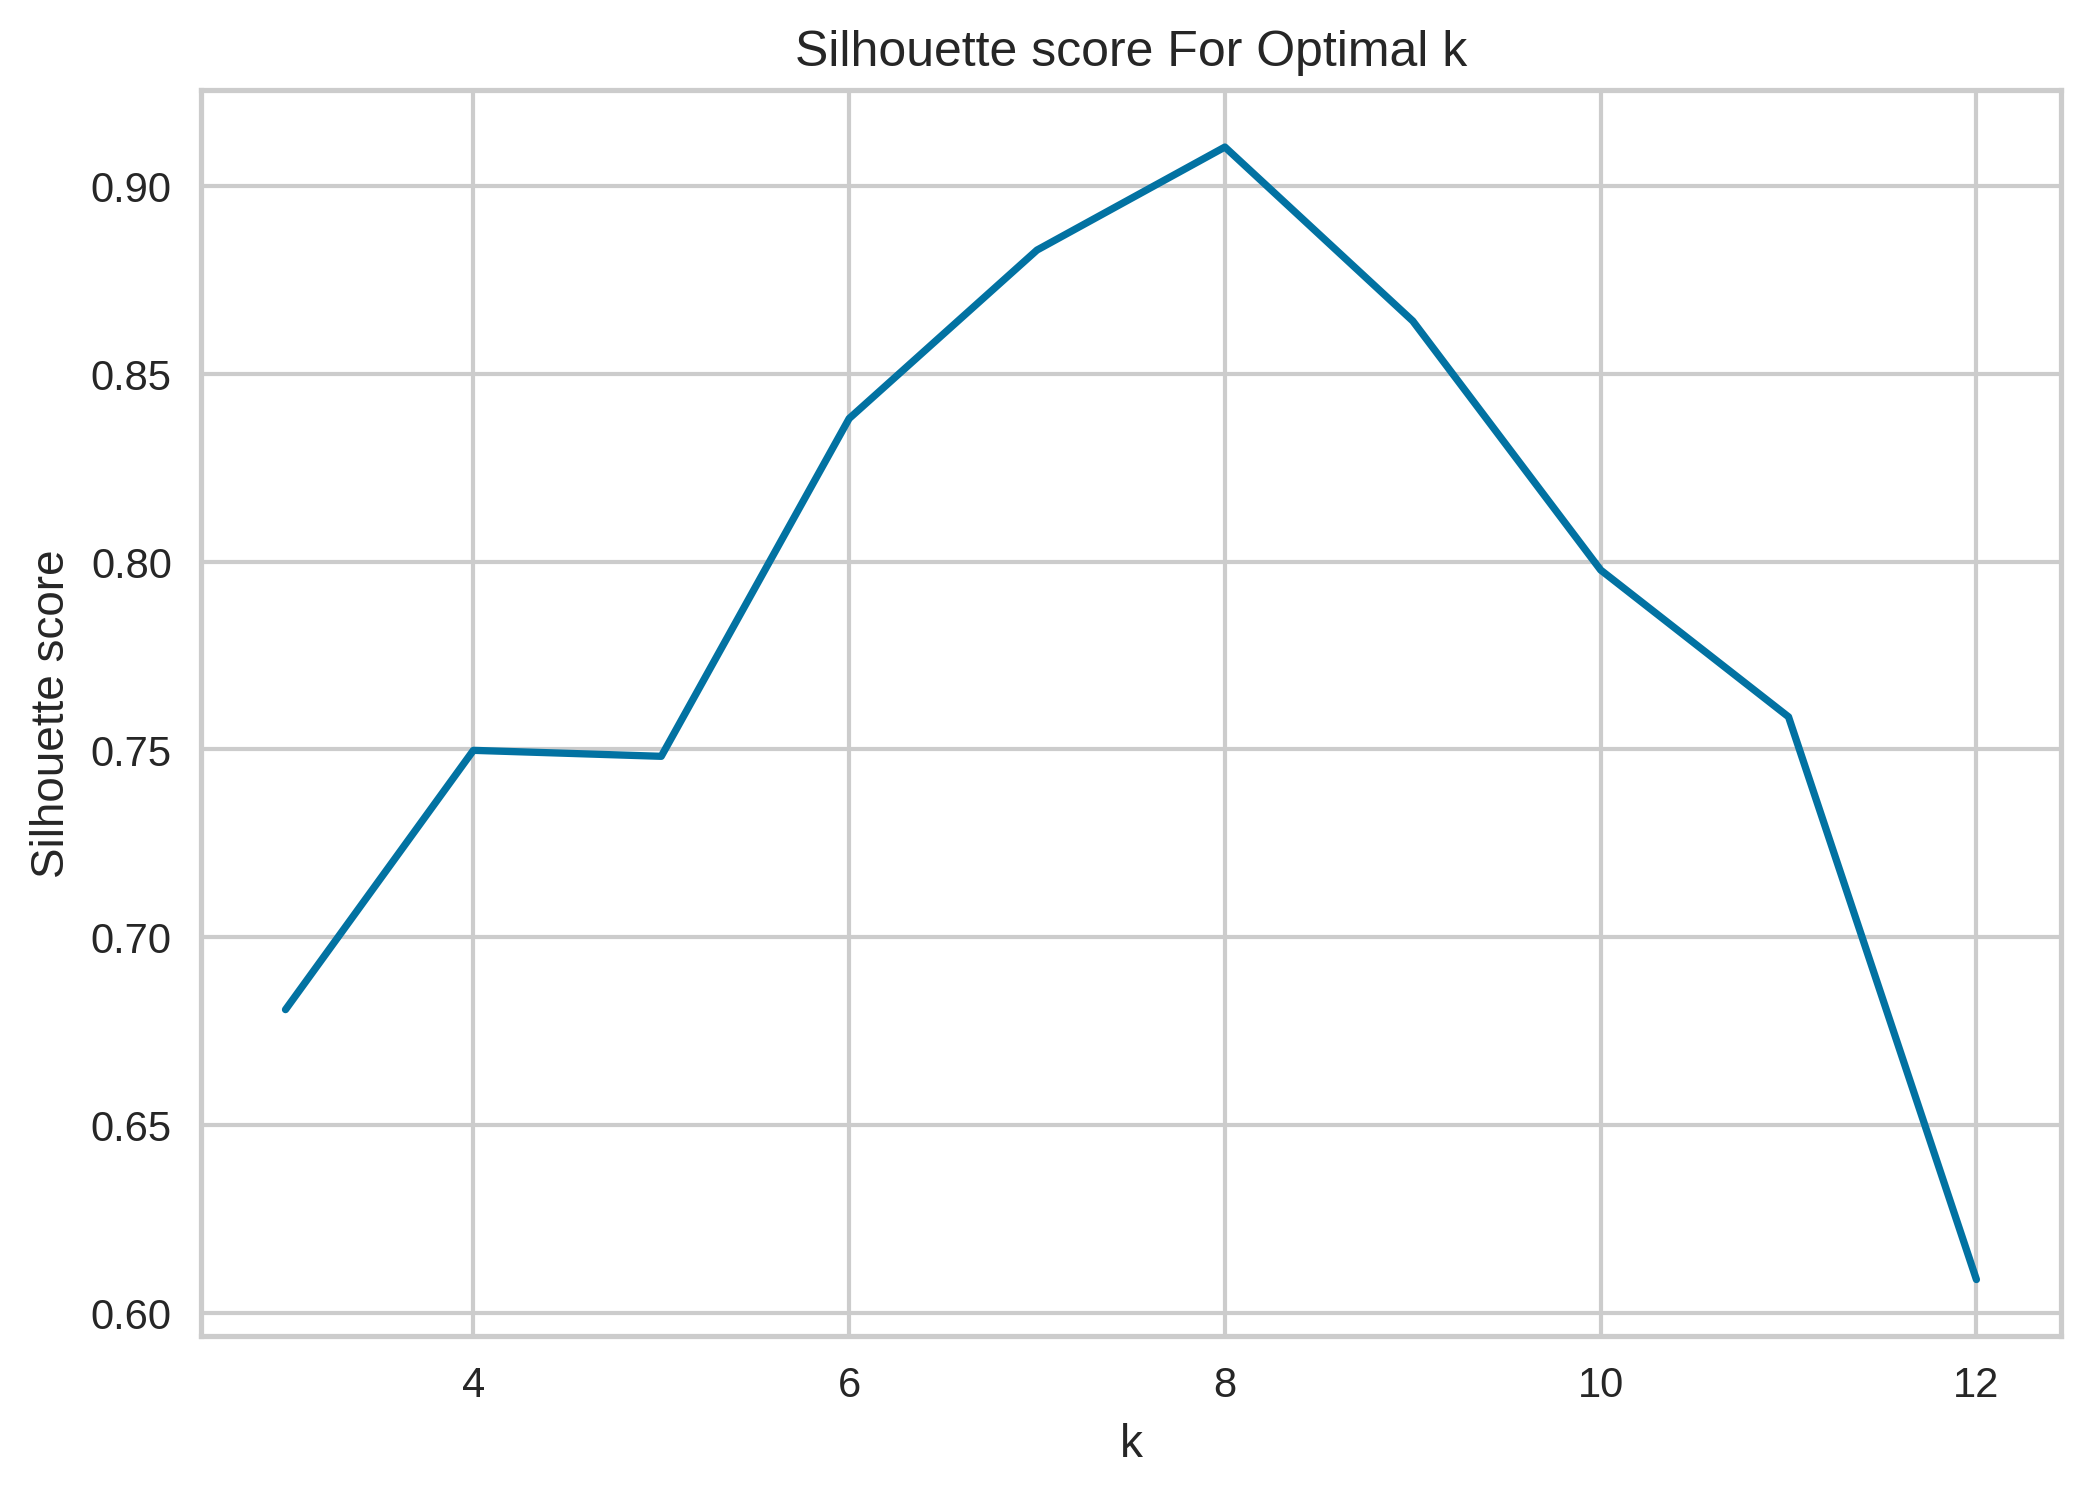

In [146]:
plt.plot(K, Sscore, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score For Optimal k')
plt.show()


# GMM using SKlearn

In [147]:
GMM = GaussianMixture(n_components=8, random_state=0).fit(X)

In [148]:
probs = GMM.predict_proba(X)
print(probs[:10])

[[0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.32968906e-051 0.00000000e+000 0.00000000e+000 0.00000000e+000
  3.01864795e-176 0.00000000e+000 1.00000000e+000 2.75393107e-104]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0

In [149]:
labels1 = GMM.predict(X)
labels1

array([2, 1, 3, 1, 6, 2, 1, 3, 5, 0, 3, 6, 0, 0, 0, 4, 2, 0, 1, 2, 2, 0,
       3, 6, 4, 2, 0, 2, 7, 7, 2, 2, 4, 2, 6, 6, 7, 0, 0, 2, 0, 3, 7, 3,
       7, 1, 3, 0, 5, 5, 7, 7, 4, 4, 5, 4, 0, 5, 5, 6, 0, 4, 4, 6, 0, 7,
       7, 5, 3, 7, 1, 7, 1, 3, 4, 0, 4, 5, 7, 0, 7, 2, 6, 1, 4, 0, 3, 4,
       3, 1, 5, 4, 4, 0, 0, 7, 4, 7, 7, 3, 4, 1, 7, 4, 4, 7, 7, 6, 6, 6,
       2, 5, 2, 5, 3, 7, 5, 6, 7, 5, 2, 5, 4, 5, 7, 7, 7, 1, 7, 5, 7, 5,
       3, 5, 4, 7, 5, 2, 4, 1, 5, 6, 0, 5, 4, 2, 0, 3, 0, 7, 4, 0, 7, 5,
       2, 3, 6, 7, 6, 3, 1, 5, 5, 6, 2, 0, 6, 4, 6, 0, 3, 3, 0, 3, 3, 7,
       1, 4, 3, 2, 7, 3, 7, 5, 6, 1, 0, 3, 6, 3, 0, 2, 2, 5, 6, 2, 1, 0,
       0, 5, 6, 7, 6, 5, 7, 2, 7, 0, 1, 1, 5, 0, 3, 1, 6, 3, 0, 1, 6, 3,
       7, 6, 1, 0, 4, 7, 3, 7, 3, 2, 3, 1, 6, 2, 5, 0, 7, 5, 2, 1, 4, 1,
       1, 6, 0, 6, 6, 3, 4, 5, 5, 1, 6, 3, 1, 1, 6, 6, 4, 6, 6, 6, 2, 3,
       5, 0, 0, 5, 2, 7, 1, 0, 1, 4, 1, 1, 3, 2, 4, 4, 6, 3, 1, 1, 2, 3,
       2, 2, 4, 4, 7, 4, 2, 6, 2, 4, 3, 2, 6, 5, 4,

# Own GaussianMixtureModel 

In [150]:
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        # returns the (r,c) value of the numpy array of X
        self.shape = X.shape 
        # n has the number of rows while m has the number of columns of dataset X
        self.n, self.m = self.shape 
        

        # initial weights given to each cluster are stored in phi or P(Ci=j)
        self.phi = np.full(shape=self.k, fill_value=1/self.k) 

        # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
        self.weights = np.full(shape=self.shape, fill_value=1/self.k)
        
        # dataset is divided randomly into k parts of unequal sizes
        random_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initial value of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in random_row ] 

        # initial value of covariance matrix of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ] 
        # theta =(mu1,sigma1,mu2,simga2......muk,sigmak)

    # E-Step: update weights and phi holding mu and sigma constant
    def e_step(self, X):
        # updated weights or P(Xi/Ci=j)
        self.weights = self.predict_proba(X)
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (phi)k
        self.phi = self.weights.mean(axis=0)

    # M-Step: update meu and sigma holding phi and weights constant
    def m_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()

            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)

    # responsible for clustering the data points correctly
    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            

    # predicts probability of each data point wrt each cluster
    def predict_proba(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster 
        likelihood = np.zeros( (self.n, self.k) ) 
        for i in range(self.k):
            distribution = multivariate_normal(mean=self.mu[i],cov=self.sigma[i])
            # pdf : probability denisty function
            likelihood[:,i] = distribution.pdf(X)
            
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    # predict function 
    def predict(self, X):
        weights = self.predict_proba(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)

In [151]:
np.random.seed(42)
gmm = GMM(k=8, max_iter=10)
gmm.fit(X)

In [152]:
labels2 = gmm.predict(X)
print(labels2)

[7 3 2 3 6 7 3 2 3 4 2 6 4 4 4 6 7 4 3 7 7 4 2 6 6 7 4 7 6 6 7 7 4 7 6 6 6
 4 4 7 4 2 6 2 6 3 2 4 3 3 6 6 5 6 3 6 4 3 3 6 4 6 6 6 4 6 6 3 2 6 3 6 3 2
 6 4 6 3 6 4 6 7 6 3 6 4 2 6 2 3 3 6 5 4 4 6 6 6 6 2 6 3 6 6 6 6 6 6 6 6 7
 3 7 3 2 6 3 6 6 3 7 3 6 3 6 6 6 3 6 3 6 3 2 3 6 6 3 7 6 3 3 6 4 3 5 7 4 2
 4 6 6 4 6 3 7 2 6 6 6 2 3 3 3 6 7 4 6 6 6 4 2 2 4 2 2 6 3 6 2 7 6 2 6 3 6
 3 4 2 6 2 4 7 7 3 6 7 3 4 4 3 6 6 6 3 6 7 6 4 3 3 3 4 2 3 6 2 4 3 6 2 6 6
 3 4 6 6 2 6 2 7 2 3 6 7 3 4 6 3 7 3 5 3 3 6 4 6 6 2 6 3 3 3 6 2 3 3 6 6 6
 6 6 6 7 2 3 4 4 3 7 6 3 4 3 6 3 3 2 7 4 6 6 2 3 3 7 2 7 7 6 6 6 6 7 6 7 6
 2 7 6 3 6 3 7 6 6 3 4 6 3 3 7 4 3 6 6 3 2 2 7 6 3 6 2 7 3 3 6 6 7 5 6 2 3
 6 4 4 6 6 6 7 3 3 6 6 3 6 3 6 2 3 6 6 6 6 3 6 6 2 6 7 6 3 3 4 3 2 3 2 6 3
 3 3 4 3 7 4 7 2 6 4 6 3 6 6 6 6 3 4 6 4 7 2 3 4 6 6 6 2 6 2 3 4 4 6 6 7 4
 2 3 7 6 2 7 2 7 3 4 7 2 2 4 2 7 4 6 3 6 3 6 4 6 2 4 4 3 5 6 6 2 6 2 6 3 3
 6 2 6 4 4 6 7 4 6 7 4 3 7 4 6 3 6 3 6 3 3 3 6 6 2 3 2 6 3 2 7 6 2 6 4 2 6
 6 3 6 6 2 6 6 6 2 7 3 6 

In [153]:
probs = gmm.predict_proba(X)
print(probs[:30].round(3))

[[0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.042 0.043 0.    0.    0.005 0.047 0.862 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.191 0.114 0.    0.    0.518 0.178 0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.02  0.022 0.    0.    0.001 0.023 0.934 0.   ]
 [0.189 0.111 0.    0.    0.526 0.175 0.    0.   ]
 [0.189 0.112 0.    0.    0.524 0.175 0.    0.   ]
 [0.196 0.119 0.    0.    0.502 0.184 0.    0.   ]
 [0.178 0.127 0.    0.    0.191 0.187 0.317 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.191 0.114 0.    0.    0.518 0.178 0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   

In [154]:
preds = gmm.predict(X)
preds

array([7, 3, 2, 3, 6, 7, 3, 2, 3, 4, 2, 6, 4, 4, 4, 6, 7, 4, 3, 7, 7, 4,
       2, 6, 6, 7, 4, 7, 6, 6, 7, 7, 4, 7, 6, 6, 6, 4, 4, 7, 4, 2, 6, 2,
       6, 3, 2, 4, 3, 3, 6, 6, 5, 6, 3, 6, 4, 3, 3, 6, 4, 6, 6, 6, 4, 6,
       6, 3, 2, 6, 3, 6, 3, 2, 6, 4, 6, 3, 6, 4, 6, 7, 6, 3, 6, 4, 2, 6,
       2, 3, 3, 6, 5, 4, 4, 6, 6, 6, 6, 2, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 3, 7, 3, 2, 6, 3, 6, 6, 3, 7, 3, 6, 3, 6, 6, 6, 3, 6, 3, 6, 3,
       2, 3, 6, 6, 3, 7, 6, 3, 3, 6, 4, 3, 5, 7, 4, 2, 4, 6, 6, 4, 6, 3,
       7, 2, 6, 6, 6, 2, 3, 3, 3, 6, 7, 4, 6, 6, 6, 4, 2, 2, 4, 2, 2, 6,
       3, 6, 2, 7, 6, 2, 6, 3, 6, 3, 4, 2, 6, 2, 4, 7, 7, 3, 6, 7, 3, 4,
       4, 3, 6, 6, 6, 3, 6, 7, 6, 4, 3, 3, 3, 4, 2, 3, 6, 2, 4, 3, 6, 2,
       6, 6, 3, 4, 6, 6, 2, 6, 2, 7, 2, 3, 6, 7, 3, 4, 6, 3, 7, 3, 5, 3,
       3, 6, 4, 6, 6, 2, 6, 3, 3, 3, 6, 2, 3, 3, 6, 6, 6, 6, 6, 6, 7, 2,
       3, 4, 4, 3, 7, 6, 3, 4, 3, 6, 3, 3, 2, 7, 4, 6, 6, 2, 3, 3, 7, 2,
       7, 7, 6, 6, 6, 6, 7, 6, 7, 6, 2, 7, 6, 3, 6,

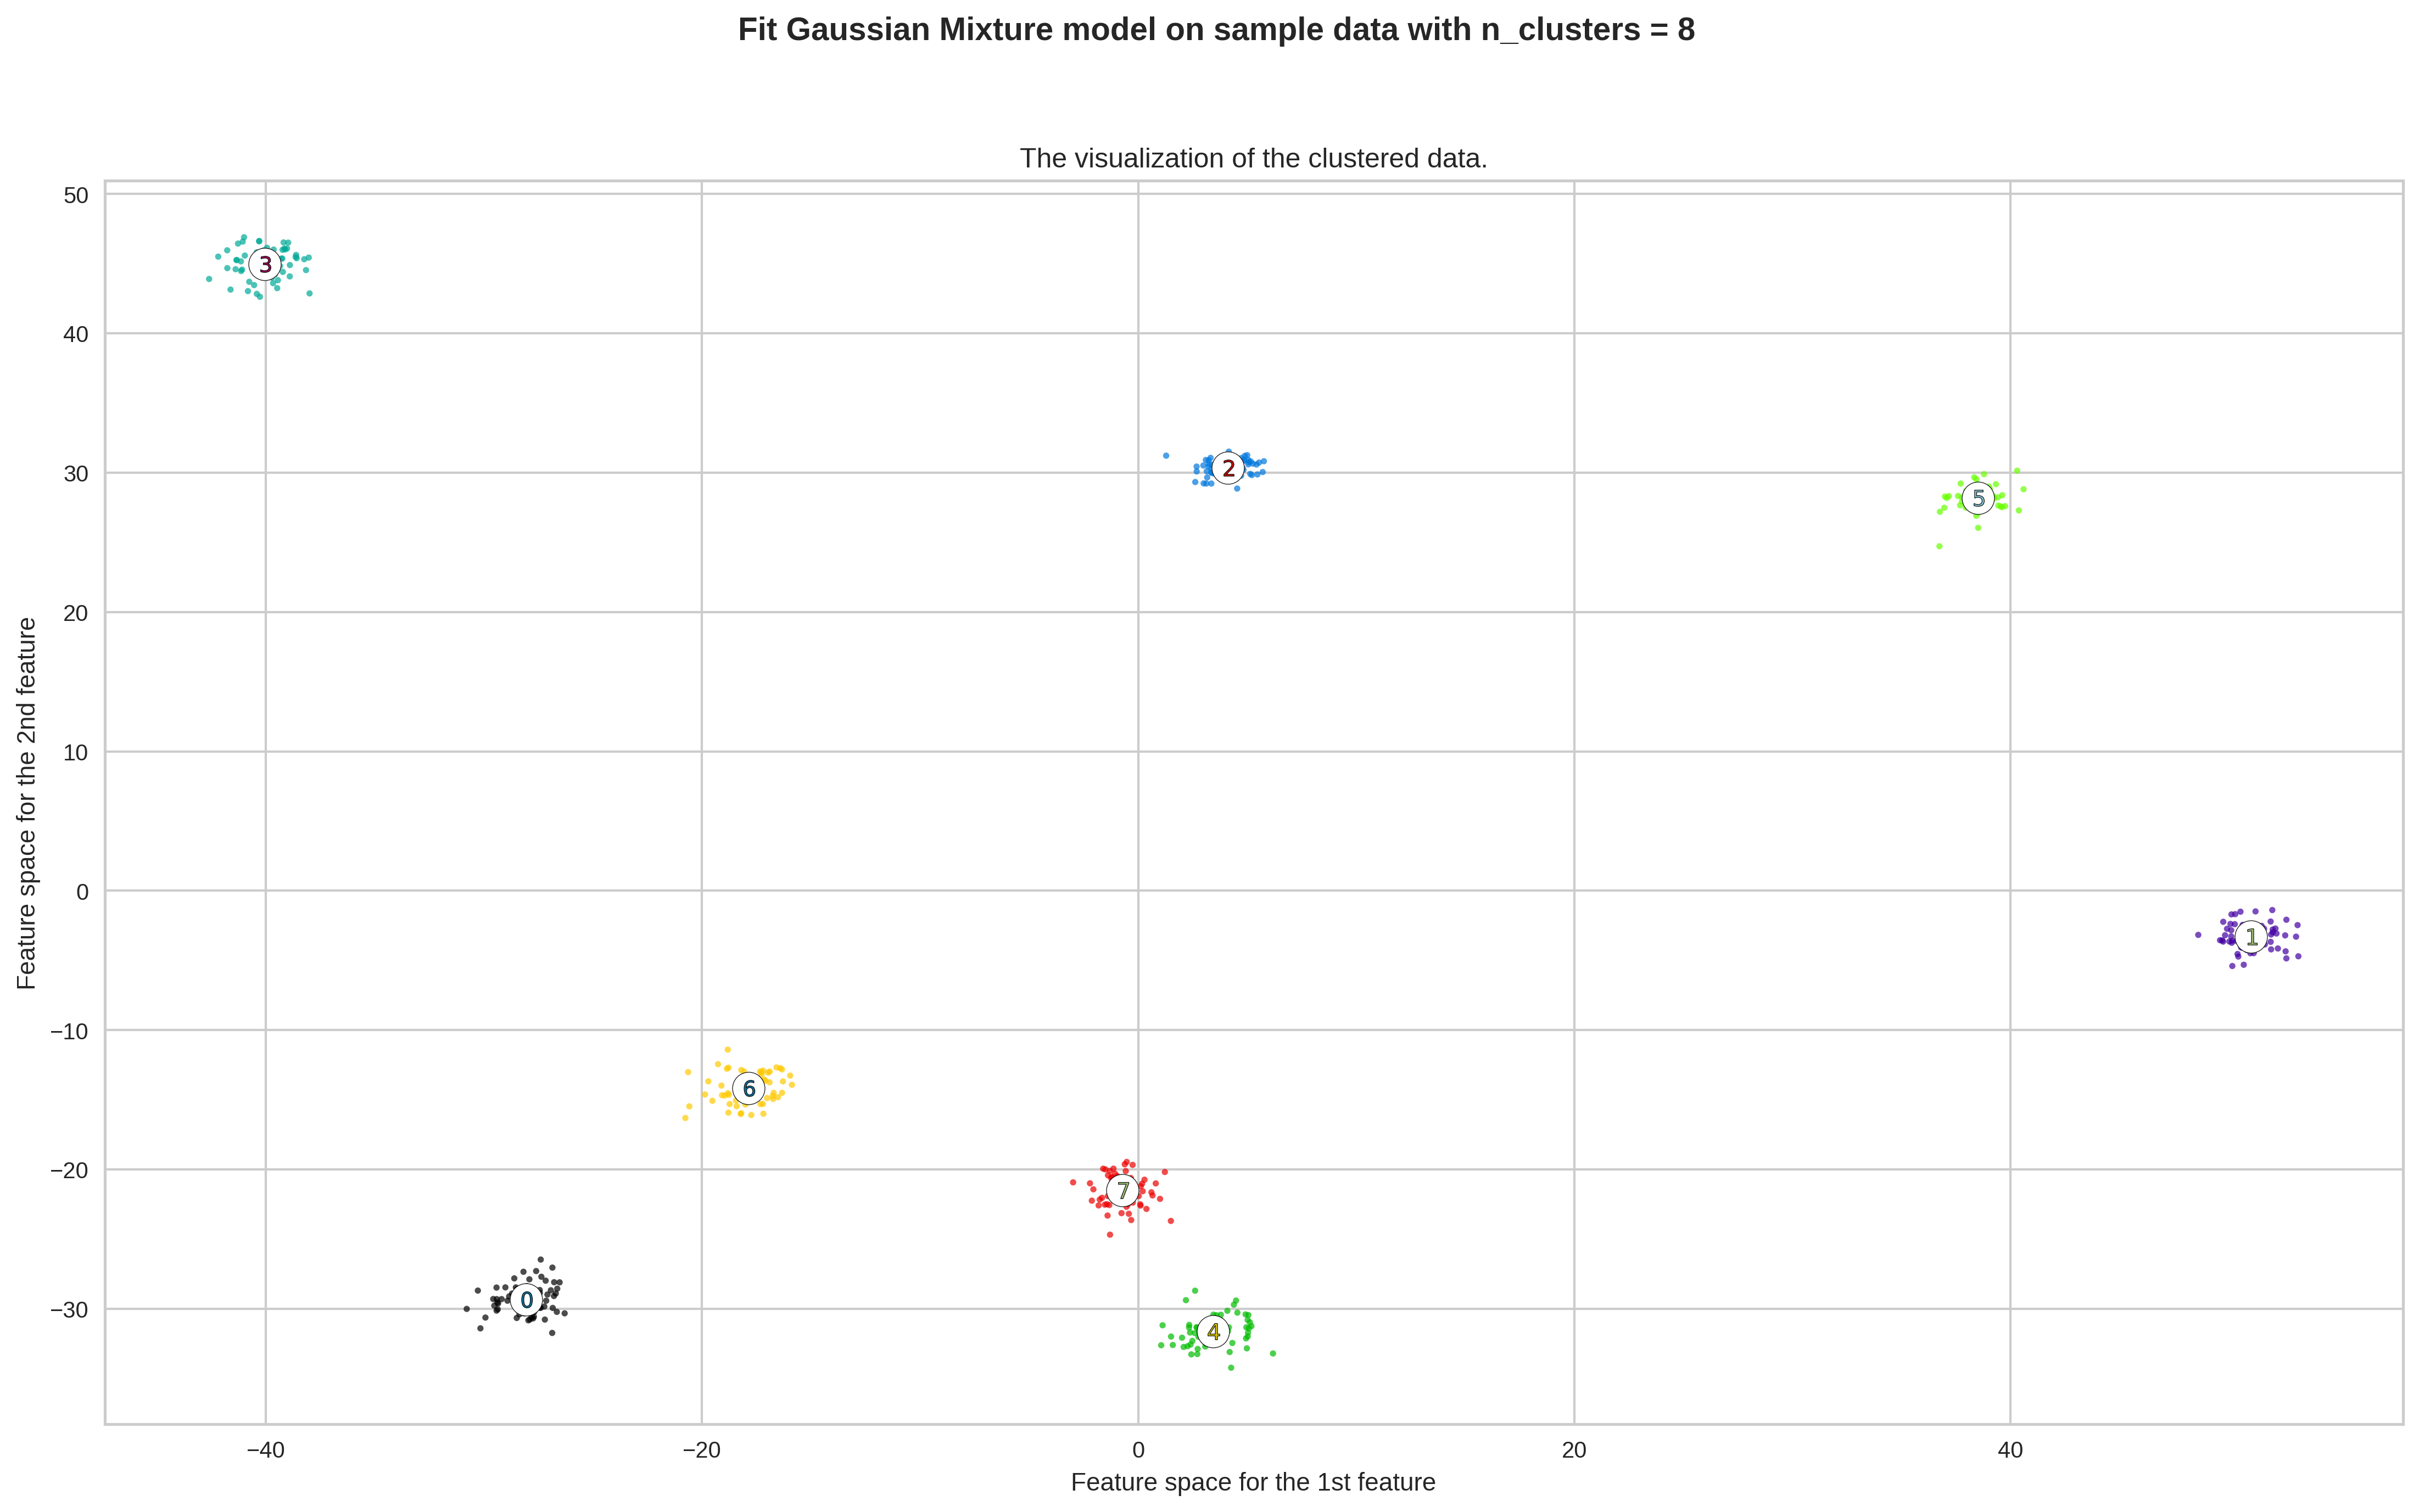

In [164]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.decomposition import PCA
pca = sklearn.decomposition.PCA(2)
pca.fit(X)
X = pca.transform(X)



range_n_clusters = [8]

for n_clusters in range_n_clusters:
    
    fig, ax2 = plt.subplots(1, 1)
    fig.set_size_inches(18, 10)

    
    # 2nd Plot showing the actual clusters formed
    cluster_labels = labels1
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = model.means_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Fit Gaussian Mixture model on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()